<a href="https://colab.research.google.com/github/KellyMuehlmann/desenpenho-loja-an-lise/blob/main/AluraStoreBr_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Função para ler CSV a partir da URL
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Análise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    faturamento_loja = 0

    for venda in dados_loja:
        preco = float(venda['Preço'])  # Somamos apenas o preço
        faturamento_loja += preco

    print(f"Faturamento Loja {i+1}: R${faturamento_loja:.2f}")
    faturamento_total += faturamento_loja

# Mostrar faturamento total
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")


Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria

In [6]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Dicionário para armazenar as vendas por categoria
vendas_por_categoria = {}

# Processar todas as lojas
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    print(f"\nVendas por categoria na Loja {i+1}:")

    # Dicionário para a loja atual
    categorias_loja = {}

    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade

        # Adicionar ao dicionário da loja atual
        if categoria in categorias_loja:
            categorias_loja[categoria] += valor_venda
        else:
            categorias_loja[categoria] = valor_venda

        # Adicionar ao dicionário geral
        if categoria in vendas_por_categoria:
            vendas_por_categoria[categoria] += valor_venda
        else:
            vendas_por_categoria[categoria] = valor_venda

    # Mostrar resultados para esta loja
    for categoria, valor in categorias_loja.items():
        print(f"  {categoria}: R${valor:.2f}")

# Mostrar resultados totais
print("\nVendas totais por categoria (todas as lojas):")
for categoria, valor in vendas_por_categoria.items():
    print(f"  {categoria}: R${valor:.2f}")

# Calcular o total geral
total_geral = sum(vendas_por_categoria.values())
print(f"\nTotal geral de vendas: R${total_geral:.2f}")



Vendas por categoria na Loja 1:
  eletronicos: R$1720525.18
  moveis: R$777243.14
  brinquedos: R$65412.04
  eletrodomesticos: R$1376501.27
  utilidades domesticas: R$51092.72
  esporte e lazer: R$169179.18
  livros: R$34360.24
  instrumentos musicais: R$369322.34

Vendas por categoria na Loja 2:
  moveis: R$703108.03
  instrumentos musicais: R$392599.48
  esporte e lazer: R$108879.57
  eletronicos: R$1715519.72
  utilidades domesticas: R$56984.93
  brinquedos: R$62300.37
  eletrodomesticos: R$1368304.66
  livros: R$41887.42

Vendas por categoria na Loja 3:
  eletrodomesticos: R$1441845.38
  moveis: R$740123.50
  instrumentos musicais: R$333781.40
  esporte e lazer: R$164527.29
  eletronicos: R$1468443.69
  brinquedos: R$81591.72
  utilidades domesticas: R$59635.75
  livros: R$35142.69

Vendas por categoria na Loja 4:
  eletrodomesticos: R$1172119.35
  moveis: R$742172.64
  esporte e lazer: R$133411.27
  livros: R$39390.51
  eletronicos: R$1615256.00
  instrumentos musicais: R$297117.

# 3. Média de Avaliação das Lojas


In [7]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Calcular a avaliação média para cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    # Variáveis para calcular a média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            # Tentamos com diferentes possíveis nomes de coluna
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                # Se não encontramos a coluna, imprimimos as chaves disponíveis
                print(f"Chaves disponíveis na loja {i+1}:", produto.keys())
                raise KeyError("Não encontramos a coluna de avaliação")

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f"Avaliação média da Loja {i+1}: {avaliacao_media:.2f}")
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")


Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [8]:
from collections import defaultdict
from urllib.request import urlopen
import csv

def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Função para calcular os Top 3 produtos que mais e menos dinheiro geraram
def top_produtos(dados_loja, numero_loja):
    ingreso_por_produto = defaultdict(float)

    for venda in dados_loja:
        produto = venda['Produto']
        preco = float(venda['Preço'])
        # Agora usamos apenas o preço (não multiplicamos pela quantidade de parcelas)
        ingreso_por_produto[produto] += preco

    # Convertendo para lista ordenada
    produtos_ordenados = sorted(ingreso_por_produto.items(), key=lambda x: x[1], reverse=True)

    top_mais_vendidos = produtos_ordenados[:3]
    top_menos_vendidos = produtos_ordenados[-3:]

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for produto, ingreso in top_mais_vendidos:
        print(f"  {produto} - Ingresos: R${ingreso:.2f}")

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for produto, ingreso in top_menos_vendidos:
        print(f"  {produto} - Ingresos: R${ingreso:.2f}")

# Percorrer todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    top_produtos(dados_loja, i)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Ingresos: R$189534.28
  Geladeira - Ingresos: R$149524.28
  Celular Plus X42 - Ingresos: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Ingresos: R$929.27
  Dinossauro Rex - Ingresos: R$918.40
  Corda de pular - Ingresos: R$870.89

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Ingresos: R$150967.83
  TV Led UHD 4K - Ingresos: R$137833.06
  Geladeira - Ingresos: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Ingresos: R$1142.54
  Dinossauro Rex - Ingresos: R$1027.41
  Cubo mágico 8x8 - Ingresos: R$858.22

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Ingresos: R$133185.99
  TV Led UHD 4K - Ingresos: R$128892.11
  Celular Plus X42 - Ingresos: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Ingresos: R$1137.76
  Dinossauro Rex - Ingresos: R$1060.78
  Cubo mágico 8x8 

# 5. Frete Médio por Loja

In [9]:
def calcular_envio_promedio(dados_loja, numero_loja):
    custos_envio = []

    for venda in dados_loja:
        custo_envio = float(venda['Frete'])
        custos_envio.append(custo_envio)

    envio_promedio = sum(custos_envio) / len(custos_envio) if custos_envio else 0

    print(f"Loja {numero_loja} - Envio médio: R${envio_promedio:.2f}")

# Processar todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    calcular_envio_promedio(dados_loja, i)


Loja 1 - Envio médio: R$34.69
Loja 2 - Envio médio: R$33.62
Loja 3 - Envio médio: R$33.07
Loja 4 - Envio médio: R$31.28


# Gráficos

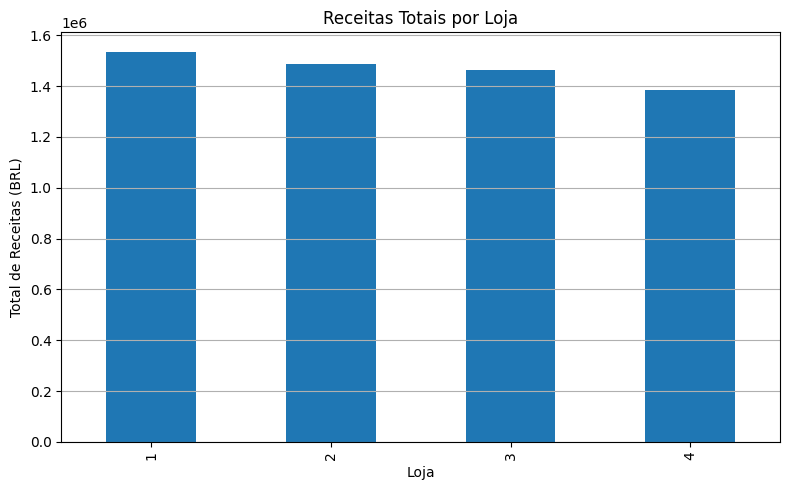

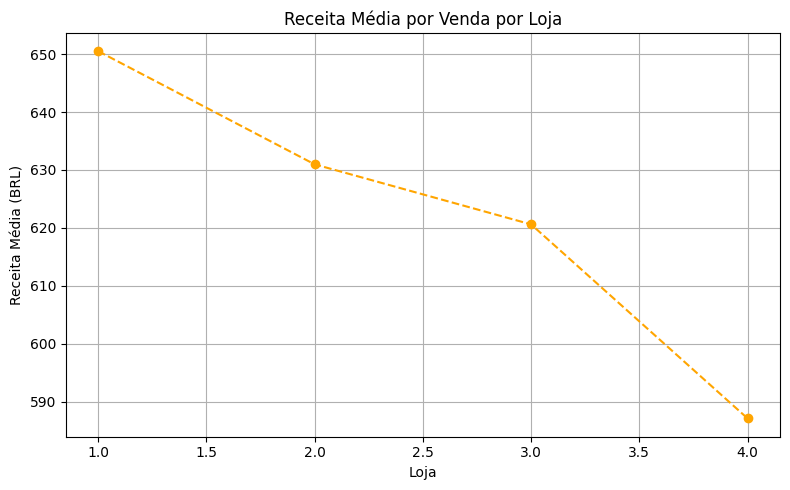

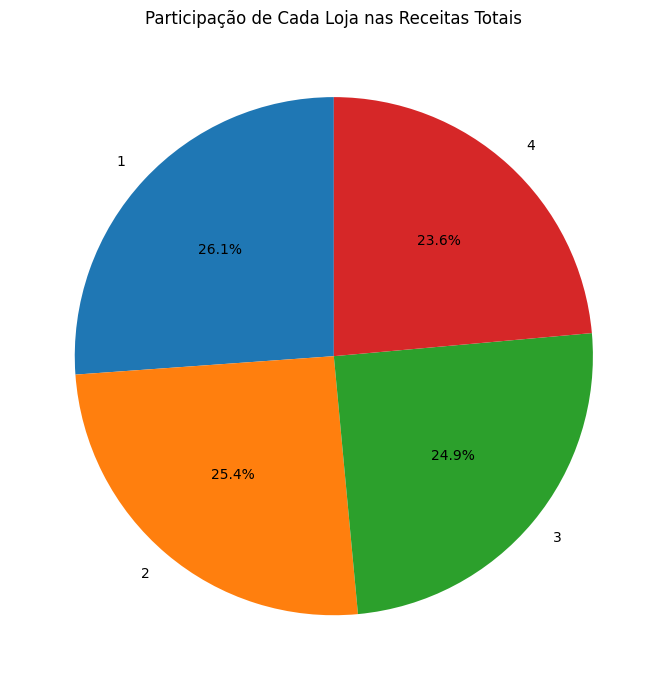

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenar de todas as lojas em único DataFrame
# Criar uma coluna 'Loja' para identificar a origem dos dados
loja['Loja'] = 1
loja2['Loja'] = 2
loja3['Loja'] = 3
loja4['Loja'] = 4

df_total = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Agora você pode prosseguir com a sua análise
df_total['Preço'] = df_total['Preço'].astype(float)

# Garantir tipo correto
df_total['Preço'] = df_total['Preço'].astype(float)

# A receita de cada venda é simplesmente o preço
df_total['Receita'] = df_total['Preço']

# Agrupar dados
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

# 🎨 Gerar 3 gráficos realmente diferentes

# 1. Barra vertical: Total de receitas
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar')
plt.title('Receitas Totais por Loja')
plt.ylabel('Total de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Linha: Receita média por venda
plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Receita Média por Venda por Loja')
plt.ylabel('Receita Média (BRL)')
plt.xlabel('Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Pizza: Distribuição do total
plt.figure(figsize=(7,7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Descrição

Conclusão: Qual loja o Senhor João deve vender?
Após análise completa dos dados de faturamento, avaliação dos clientes, categorias de produtos, produtos mais e menos vendidos e custo médio do frete, observamos o seguinte:Análise por Critério
Faturamento Total:
A Loja 4 apresentou o menor faturamento entre todas, o que indica um desempenho financeiro mais fraco.

Avaliação Média dos Clientes:
A Loja 4  teve a avaliação média (4,00), ficando abaixo da média das  outras lojas que ficaram acima da média com exeção da loja 1 que ficou com 3,98.

Frete Médio:
Em comparação as outras três lojas, a Loja 4 teve o menor frete , o que pode atrair clientes levando em consideração que esse valor não seja custeado pela loja 4.

Produtos Mais e Menos Vendidos:
A Loja 4 apresentou menor diversificação entre os produtos mais vendidos e também menos receita gerada com os produtos menos vendidos, o que indica um catálogo menos competitivo.

Recomendação Final
Recomendo que o Senhor João venda a Loja 4.
Essa loja apresenta  indicadores preocupantes em  alguns  aspectos analisados: menor faturamento, avaliação dos clientes não é negativa porém nada de extraordinário. Esses fatores combinados reduzem seu potencial de crescimento e competitividade no mercado.



